In [1]:
## set paths to catalog/script files and output directories (for plots)
data_dir = '../hdf5files/'
script_dir = '../SIP_jerome_scripts2/'
out_dir = '/Users/Andy/Desktop/'

In [2]:
## load plotting routines
execfile(script_dir+'plot_routines.py')

In [3]:
egs = Table.read(data_dir+'egs.hdf5')

/Users/Andy/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
egs_selection = np.where ( \
                          (egs['PhotFlag']==0) &\
                          (egs['CLASS_STAR']>0.9) & \
                          (egs['ACS_F606W_flux'] > 0) &\
                         (egs['ACS_F814W_flux'] > 0) &\
                          (egs['WFC3_F125W_flux'] > 0) &\
                         (egs['WFC3_F160W_flux'] > 0))

# last 3 conditions ensure log10() exists

In [5]:
egs_temp = egs[egs_selection]
egs_selection2 = np.where ( \
                          -2.5*np.log10(egs_temp['WFC3_F125W_flux']) <= 1.359465)
egs_final = egs_temp[egs_selection2]
total_length = len(egs_final)
print total_length

317


In [6]:
## define variables for GOODS-S

f606_egs_flux = egs_final['ACS_F606W_flux']
f814_egs_flux = egs_final['ACS_F814W_flux']  ## rest-frame .814 μm magnitude
f125_egs_flux = egs_final['WFC3_F125W_flux']   ## rest-frame 1.25 μm magnitude
f160_egs_flux = egs_final['WFC3_F160W_flux']   ## rest-frame 1.60 μm magnitude

f606_egs_mag = -2.5*np.log10(f606_egs_flux)
f814_egs_mag = -2.5*np.log10(f814_egs_flux)
f125_egs_mag = -2.5*np.log10(f125_egs_flux)
f160_egs_mag = -2.5*np.log10(f160_egs_flux)

f606_f814_egs = f606_egs_mag - f814_egs_mag
f814_f125_egs = f814_egs_mag - f125_egs_mag
f125_f160_egs = f125_egs_mag - f160_egs_mag

# mstar_egs = egs_final['M_med'] # already logged?
# z_egs = egs_final['z_best']  ## redshift

In [7]:
f814_f125_egs_sorted1 = [x for _,x in sorted(zip(f606_f814_egs,f814_f125_egs))]
f606_f814_egs_sorted1 = np.sort(f606_f814_egs)
movingmedian_f606_f814_egs1 = np.array([])
movingmedian_f814_f125_egs1 = np.array([])
for i in range (0,total_length-15):
    data2 = np.array([])
    for j in range(i,i+15):
        data2 = np.append(data2,f606_f814_egs_sorted1[j])
    movingmedian_f606_f814_egs1 = np.append(movingmedian_f606_f814_egs1,np.median(data2))
for k in range (0,total_length-15):
    data3 = np.array([])
    for l in range(k,k+15):
        data3 = np.append(data3,f814_f125_egs_sorted1[l])
    movingmedian_f814_f125_egs1 = np.append(movingmedian_f814_f125_egs1,np.median(data3))
# print movingmedian_f606_f814_egs

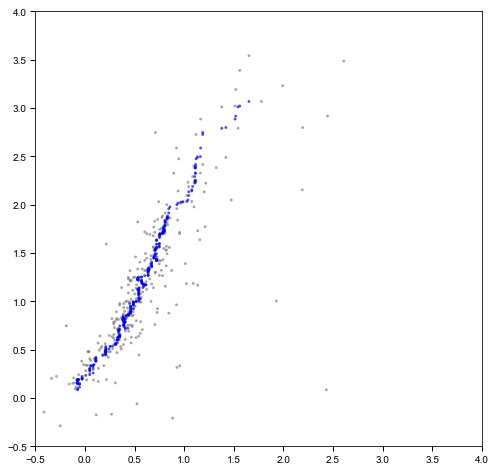

In [8]:
fig=plt.figure(figsize=(8,8))
plt.scatter(f814_f125_egs_sorted1,f606_f814_egs_sorted1,c='grey',edgecolors='none',s=8,alpha=0.7)
plt.scatter(movingmedian_f814_f125_egs1,movingmedian_f606_f814_egs1,c='blue',edgecolors='none',s=8,alpha=0.7)
plt.xlim(-0.5,4)
plt.ylim(-0.5,4)
plt.savefig('/Users/Andy/Desktop/GIJ_pt4_egs_starlike_movingmedian.pdf')

[0.77138541 0.41232855 0.92767234 ... 0.22660113 0.0672324  0.47605247]


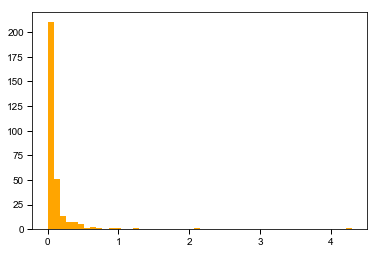

In [9]:
distance_606_814_125_egs = np.array([])
for m in range(0,total_length-15):
    min_distance = 99999
    for n in range(0,total_length-15):
        dist = math.sqrt((movingmedian_f606_f814_egs1[n]-f606_f814_egs_sorted1[m])**2+(movingmedian_f814_f125_egs1[n]-f814_f125_egs_sorted1[m])**2)
        if (dist < min_distance):
            min_distance = dist
    distance_606_814_125_egs = np.append(distance_606_814_125_egs,min_distance)
print distance_606_814_125_egs
plt.hist(distance_606_814_125_egs,50,color='orange')
plt.savefig(out_dir+'distance_606_814_125_egs.pdf')

In [10]:
f125_f160_egs_sorted2 = [x for _,x in sorted(zip(f814_f125_egs,f125_f160_egs))]
f814_f125_egs_sorted2 = np.sort(f814_f125_egs)
movingmedian_f814_f125_egs2 = np.array([])
movingmedian_f125_f160_egs2 = np.array([])
for i in range (0,total_length-15):
    data2 = np.array([])
    for j in range(i,i+15):
        data2 = np.append(data2,f814_f125_egs_sorted2[j])
    movingmedian_f814_f125_egs2 = np.append(movingmedian_f814_f125_egs2,np.median(data2))
for k in range (0,total_length-15):
    data3 = np.array([])
    for l in range(k,k+15):
        data3 = np.append(data3,f125_f160_egs_sorted2[l])
    movingmedian_f125_f160_egs2 = np.append(movingmedian_f125_f160_egs2,np.median(data3))

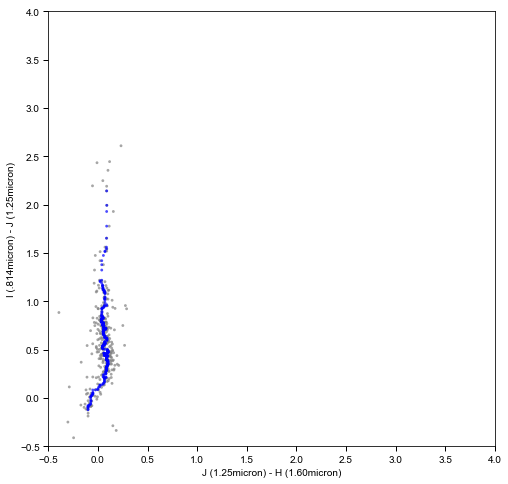

In [11]:
fig=plt.figure(figsize=(8,8))
plt.scatter(f125_f160_egs_sorted2,f814_f125_egs_sorted2,c='gray',edgecolors='none',s=8,alpha=0.7)
plt.scatter(movingmedian_f125_f160_egs2,movingmedian_f814_f125_egs2,c='blue',edgecolors='none',s=8,alpha=0.7)
plt.xlim(-0.5,4)
plt.ylim(-0.5,4)
plt.xlabel('J (1.25micron) - H (1.60micron)')
plt.ylabel('I (.814micron) - J (1.25micron)')
plt.savefig('/Users/Andy/Desktop/IJH_pt4_egs_starlike_movingmedian.pdf')

[0.60180861 0.32397017 0.35520117 ... 0.08163843 0.04880254 0.01736764]


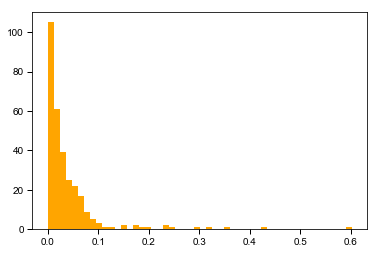

In [12]:
distance_814_125_160_egs = np.array([])
for m in range(0,total_length-15):
    min_distance = 99999
    for n in range(0,total_length-15):
        dist = math.sqrt((movingmedian_f814_f125_egs2[n]-f814_f125_egs_sorted2[m])**2+(movingmedian_f125_f160_egs2[n]-f125_f160_egs_sorted2[m])**2)
        if (dist < min_distance):
            min_distance = dist
    distance_814_125_160_egs = np.append(distance_814_125_160_egs,min_distance)
print distance_814_125_160_egs
plt.hist(distance_814_125_160_egs,50,color='orange')
plt.savefig(out_dir+'distance_814_125_160_egs.pdf')

In [13]:
distance1_egs = np.array([]) # distance of x-value of GIJ from the moving median
distance2_egs = np.array([]) # distance of x-value of IJH from the moving median
for i in range (7,total_length-15):
    distance1_egs = np.append(distance1_egs,movingmedian_f814_f125_egs1[i-7]-f814_f125_egs_sorted1[i])
    distance2_egs = np.append(distance2_egs,movingmedian_f125_f160_egs2[i-7]-f814_f125_egs_sorted2[i])

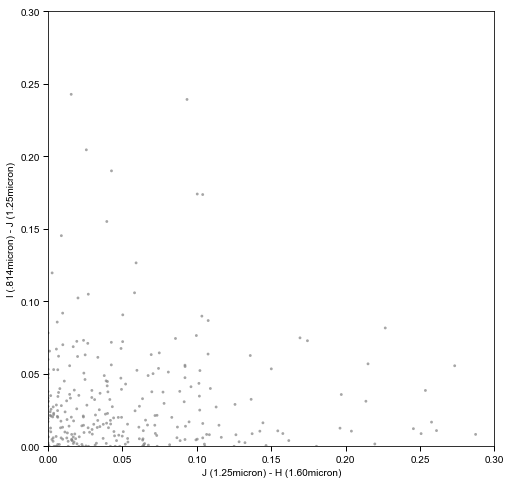

In [14]:
fig=plt.figure(figsize=(8,8))
plt.scatter(distance_606_814_125_egs,distance_814_125_160_egs,c='gray',edgecolors='none',s=8,alpha=0.7)
plt.xlim(0,0.3)
plt.ylim(0,0.3)
plt.xlabel('J (1.25micron) - H (1.60micron)')
plt.ylabel('I (.814micron) - J (1.25micron)')
plt.savefig(out_dir+'distance_diagram_egs.pdf')